# Análisis de Sentimientos de Twitter

## Preliminares



### Problema


Se solicita poder conocer el sentimiento asociado a los comentarios de twitter, para clasificarlos en sensaciones positivas o negativas. Se busca que los valores de las métricas de accuracy y precision sean de: 0.63 y 0.72 respectivamente. 



### Objetivo


Idenficar, el mejor modelo de clasificación binaria, según las métricas del cliente, para obtener de manera una predicción confiable de la carga emotiva positiva o negativa, de los mensajes de la red social Twitter.



### Metodología


__1. Importación de librerías, funciones y data frame.__


__2. Análisis explotario de los datos e ingeniería de atributos:__

Se revisarán los tipos de datos presentes en la muestra. Se buscarán los datos perdidos, se generará información estadística de los datos. Se considerará analizar en detalle, las variables más importantes que puedan influir en el vector objetivo. 

En esta etapa, también se considerará recodificar las variables categóricas del sentimiento del texto, para reducir los tweets, a dos categorías: sentimiento positivos y negativos. Esta binarización permitirá implementar los modelos de manera adecuada. 

__3. Modelación:__

Teniendo en cuenta los atributos seleccionados, se utilizará. Se buscará implementar un modelo simple, para establecer una métrica de base, con la cual poder comparar, la aplicación de modelos más complejos con GridSearch, a fin de poder comparar y establecer si hay mejoras en el desempeño predictivo. En cuanto a los modelos de clasificación utilizados, serán los siguientes:

**`3.1 Logistic Regression`**: Este será el primer modelo a implementar, debido a que es simple y eficiente. No requiere de ajustes y es fácil de interpretar.

**`3.2 MultinomialNB`**: Este utilizado en general, problemas que involucran texto debido a su buen desempeño. Es rápido de implementar y no requiere parametrización.

* alpha: np.linspace(0.1,1.0,10)
* class_prior: [None,[0.4, 0.6],[0.6, 0.4],[.1,.9],[.2, .8]]

**`3.3 RandomForestClassifier`**: Este modelo es robusto y con un gran costo de implementación debido a los ensabmblajes, pero una de sus mejores características es que reduce el sobreentrenamiento, lo cual lo hace más preciso al momento de aplicarlo a nuevos datos. 

* n_estimators: [50,250,500]
* max_features: ['sqrt']
* max_depth: [16, 32]
* min_samples_split: [6,10]
* min_samples_leaf: [3,7]

**`3.4 AdaBoost`**: Es un modelo que se enfoca en un entrenamiento basado en las observaciones mál calsificadas. Pertenece a la familia de algoritmo de ensamble.

* n_estimators : [10, 100, 1000],
* learning_rate : [0.001, 0.01, 0.1],


**`3.5 GradientBoostingClassifier`**: Es un modelo que posee diferentes hiperparámetros para manejar. Al ser un algoritmo de ensamble, implementará arboles de desición de manera secuencial.

* n_estimators : [10, 100, 1000],
* learning_rate : [0.001, 0.01, 0.1],
* subsample : [0.5, 0.7, 1.0]

Durante el modelamiento se podría considerar modifcar otros parámetros como: max_depth o min_samples_leaf.

__4. Métricas de evaluación de los modelos de clasificación:__

Para poder identificar el modelo con mejor desempeño, se procedera a utilizar las métricas de: Accuracy, Precision y AUC. También es posible visualizar el desempeño mediante la curva ROC. Lo anterior permitirá seleccionar el modelo que da una mejor respuesta al problema planteado.

#### Alumnos: 
- Guillermo Errázuriz
- Cristian Gómez-Loaiza

## Aspectos Computacionales

En cuanto a las librerías más importantes a utilizar y las principales funciones que cumplirán, los detalles son los siguientes:

- **`matplotlib`**: generación de gráficos (versión a utilizar: 3.1.3).


- **`numpy`**: operación con vectores (versión a utilizar: 1.18.1).


- **`pandas`**: depende de numpy, es una librería que permitirá estructurar los datos (versión a utilizar: 1.0.1).

 
- **`python`**: lenguaje de programación de alto nivel, con el cual se manipularan los datos (versión a utilizar: 3.7.6).


- **`scipy`**: módulos que nos permitirán optimizar el analisis de los datos, mediante herramientas y algoritmos matemáticos (versión a utilizar: 1.4.1).


- **`scikit-learn`**: biblioteca donde se encuentran almacenados los modelos de aprendizaje automático, y las herramientas para generar métricas de evaluación (versión a utilizar: 0.22.1).


- **`seaborn`**: librería que se construye en base a matplotlib, con el fin de facilitar la generación de la visualización de los datos (versión a utilizar: 0.10.0).


- **`ntlk`**: módulos que permiten trabajar con datos de lenguaje natural (versión a utilizar: 3.4.5)

## __1. Importación de librerías, funciones y data frame.__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, precision_score, f1_score

import glob, os, pickle, nltk, re, string, warnings

warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10, 20)
plt.rcParams["axes.labelsize"] = 15

In [2]:
df = pd.read_csv('twttr.csv')

## __2. Análisis explotario de los datos e ingeniería de atributos__

In [3]:
df.sample(10)

,tweet_id,sentiment,author,content
14583,1964577912,sadness,laurenayala,"im sick,youre sick. imy"
6169,1961174539,fun,CuddlyAlex,"I've got sunburnt knees... it's funny now, but..."
25558,1695135957,happiness,missxpistol,"@skingirl69 yeah, i'm so excited."
7431,1961692571,neutral,xxnicky,@MegMegMeg123 I ran out of space....hugging Ja...
36053,1753236475,happiness,TheMiss47,I ate a foot long from subway like an hour ago...
12535,1963598246,worry,Heros_Wife,"@ my sisters crying my eyes out, hubby called ..."
4964,1960573988,sadness,CdreaminA,ugh back to work today
679,1957123350,relief,Thamar,@nawid nope het is LOST&amp;found he ;-)
15983,1965086707,sadness,AnduTros,"Just an observation: Aside from the riverwalk,..."
34325,1752845916,relief,flimgeeks,"@nettagyrl Thanks, it's just too good for TV, ..."


In [4]:
df.shape

(40000, 4)

In [5]:
df.isna().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


El dataframe, posee solo cuatro columnas de las cuales se seleccionarán solo 2. Se removerá el autor y el id, ya que para al aplicar los modelos no se requerirá información de trazabilidad respecto al ususario.

La columna content, esta conformada por cadenas de texto, posee diferentes carácteres y nombres de usuario, los cuales serán removidos, para que el texto sea más uniforme.

No se observan datos faltantes en las columnas del dataframe.

Nuestro vector objetivo, está constituido por la columna sentiment, la cual deberá ser binarizada.

#### Data wrangling

In [7]:
df = df.drop(['author', 'tweet_id'],1)

In [8]:
df['content'] = df['content'].str.lower() 

In [9]:
df2 = df

In [10]:
df2.head(20)

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,layin n bed with a headache ughhhh...waitin o...
2,sadness,funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends soon!
4,neutral,@dannycastillo we want to trade with someone w...
5,worry,re-pinging @ghostridah14: why didn't you go to...
6,sadness,"i should be sleep, but im not! thinking about ..."
7,worry,hmmm. http://www.djhero.com/ is down
8,sadness,@charviray charlene my love. i miss you
9,sadness,@kelcouch i'm sorry at least it's friday?


In [11]:
df['content'] = df['content'].str.replace(r"http\S+|www\S+|https\S+",'')

In [12]:
df['content'] = df['content'].str.replace(r'\@\w+|\#','')

In [13]:
def cleanTxtdot(text):
    text = re.sub(r'\.',' ',text)
    return text

In [14]:
df['content'] = df['content'].apply(cleanTxtdot)

In [15]:
df.head(20)

,sentiment,content
0,empty,i know i was listenin to bad habit earlier a...
1,sadness,layin n bed with a headache ughhhh waitin o...
2,sadness,funeral ceremony gloomy friday
3,enthusiasm,wants to hang out with friends soon!
4,neutral,we want to trade with someone who has houston...
5,worry,re-pinging : why didn't you go to prom? bc my ...
6,sadness,"i should be sleep, but im not! thinking about ..."
7,worry,hmmm is down
8,sadness,charlene my love i miss you
9,sadness,i'm sorry at least it's friday?


In [16]:
def clean_text(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    return txt

In [17]:
df['content'] = df['content'].apply(clean_text)

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\geldz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
lemmatizer = nltk.WordNetLemmatizer()

In [20]:
df['content'] = df.content.apply(lambda x: lemmatizer.lemmatize(x))

#### Binarización de vector objetivo

Para la recodificación, se clasificarán los sentimientos en positivos y negativos, sin embargo existen 13 diferentes sentimientos. Se procederá a reclasificar estos sentimientos en positivos y negativos, en base a una lista. De manera inicial solo se clasificarán solo los positivos.

In [21]:
df['sentiment'].value_counts('%')

neutral       0.215950
worry         0.211475
happiness     0.130225
sadness       0.129125
love          0.096050
surprise      0.054675
fun           0.044400
relief        0.038150
hate          0.033075
empty         0.020675
enthusiasm    0.018975
boredom       0.004475
anger         0.002750
Name: sentiment, dtype: float64

In [22]:
neutral = np.isin(df['sentiment'], ['neutral'])
positive = np.isin(df['sentiment'], ['happiness','love','surprise','fun','relief','enthusiasm'])

Se asigna de manera aleatoria los sentimientos positivos o negativos a la clase neutral.

In [23]:
df['sentiment'] = np.where(df['sentiment'] == 'neutral',np.random.choice(['positive', 'negative'],size=len(df['sentiment'])),df['sentiment'])

Todos los sentimiento que no sean positivos, se les asigna la clase negativa.

In [24]:
df['sentiment'] = np.where(positive, 'positive','negative')

Finalmenete se binariza la variable sentimiento, donde el valor de uno es sentimiento positivo y 0 es un sentimiento negativo

In [25]:
df['sentiment'] = np.where(df['sentiment'] == 'positive',1,0)

In [26]:
df.head(20)

,sentiment,content
0,0,i know i was listenin to bad habit earlier a...
1,0,layin n bed with a headache ughhhh waitin o...
2,0,funeral ceremony gloomy friday
3,1,wants to hang out with friends soon
4,0,we want to trade with someone who has houston...
5,0,repinging why didnt you go to prom bc my bf d...
6,0,i should be sleep but im not thinking about an...
7,0,hmmm is down
8,0,charlene my love i miss you
9,0,im sorry at least its friday


In [27]:
df.sentiment.value_counts('%')*100

0    61.7525
1    38.2475
Name: sentiment, dtype: float64

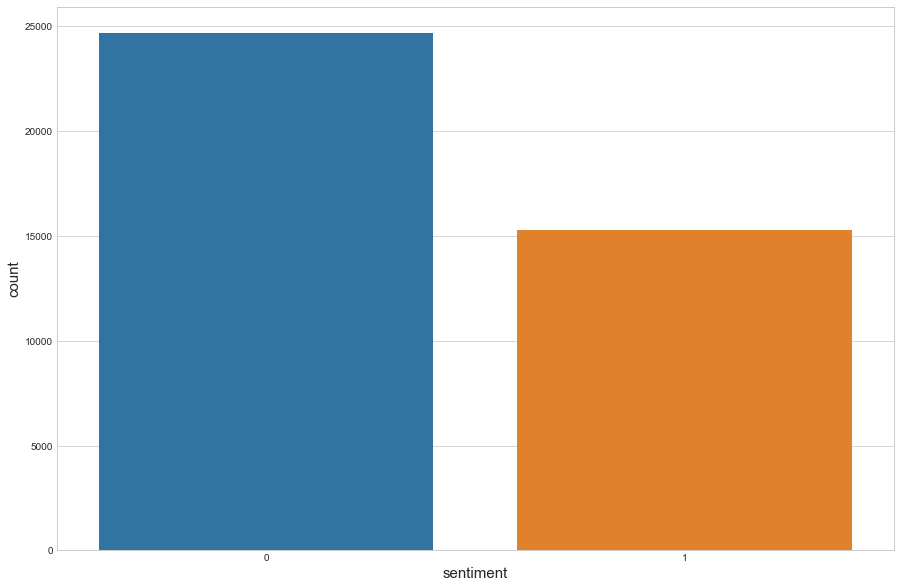

In [28]:
plt.figure(figsize = (15,10))
sns.countplot(x=df['sentiment'],order=df['sentiment'].value_counts().index);

Se puede apreciar que con la asignación aleatorio de los valores neutrales a positivos y negativos, no se observa un gran desbalance de clases. Casí el 40% de los valores son positivos.

In [29]:
stopwords2 = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly","haha", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't","dont", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've","ive", "ix","ill", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",]

In [30]:
count_vec = CountVectorizer(stop_words = stopwords2,max_features=5000)
words = count_vec.fit_transform(df['content'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in count_vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

In [31]:
df_freq = frequency.head(15)

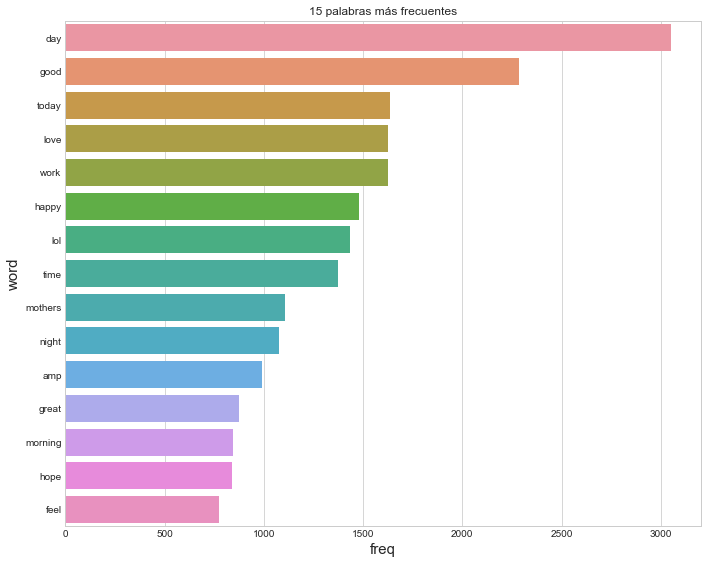

In [32]:
plt.figure(figsize=(10, 8))
plt.title("15 palabras más frecuentes");
df_freq.sort_values(by=["freq"], ascending=False, inplace=True)
sns.barplot(x=df_freq.freq, y='word', data=df_freq)
sns.set(font_scale=1)
plt.tight_layout()

# __3. Modelación__

### Separación en conjuntos de entrenamiento y test

In [33]:
X_train , X_test , y_train , y_test = train_test_split(words,df['sentiment'], test_size=.20 , random_state=1028)

### 3.1 Modelo: Regresión Logística

In [34]:
model_LR = LogisticRegression()

In [35]:
model_LR.fit(X_train, y_train);

In [36]:
y_hat_LR = model_LR.predict(X_test)
y_hat_LR_proba = model_LR.predict_proba(X_test)

In [37]:
LR_AUC = round(roc_auc_score(y_test, y_hat_LR), 3)

### 3.2 Modelo: Multinomial Naive Bayes

In [38]:
model_MNB = MultinomialNB()

In [39]:
model_MNB_cv = GridSearchCV(model_MNB,
                         {'alpha':np.linspace(0.1,1.0,10),
                          'class_prior': [None,tuple([.8, .2]),tuple([0.6, 0.4]),tuple([.725,.275]),tuple([.75, .25])]},cv=5).fit(X_train, y_train)

In [40]:
[None,tuple([.8, .2]),tuple([0.6, 0.4]),tuple([.7,.3]),tuple([.725,.275]),tuple([.65,.35]),tuple([.75, .25])]

[None,
 (0.8, 0.2),
 (0.6, 0.4),
 (0.7, 0.3),
 (0.725, 0.275),
 (0.65, 0.35),
 (0.75, 0.25)]

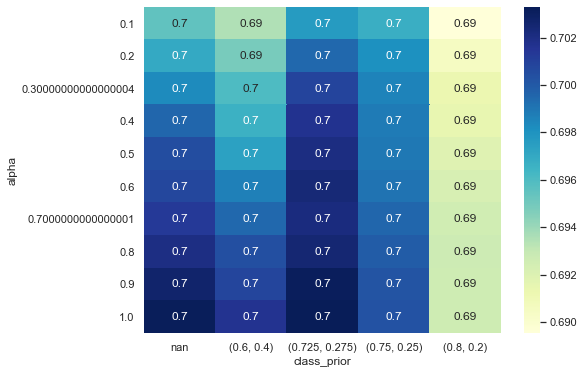

In [41]:
hm_df = pd.DataFrame(model_MNB_cv.cv_results_["params"])
hm_df["mean_test_score"] = model_MNB_cv.cv_results_["mean_test_score"]
pivoted_hm_df = hm_df.pivot(index='alpha', columns='class_prior', values='mean_test_score')
plt.rcParams["figure.figsize"] = (8,6)
sns.heatmap(pivoted_hm_df, annot = True,cmap='YlGnBu')

In [42]:
model_MNB_cv.best_estimator_.class_prior

(0.725, 0.275)

In [43]:
model_MNB_cv.best_estimator_.alpha

1.0

Se utilizará la proporción con 72.5% y 25.5%, ya se obtiene un mejor desempeño del modelo.

In [44]:
y_hat_MNB = model_MNB_cv.predict(X_test)
y_hat_MNB_proba = model_MNB_cv.predict_proba(X_test)

In [45]:
MNB_AUC = round(roc_auc_score(y_test, y_hat_MNB), 3)

### 3.3 Modelo: Random Forest

In [46]:
model_RF = RandomForestClassifier()

In [ ]:
#parametros soportados por el procesador
model_RF_cv = GridSearchCV(RandomForestClassifier(),{
                                    'n_estimators': [50,250,500], 
                                    'max_features': ['sqrt'], 
                                    'max_depth': [16, 32], 
                                    'min_samples_split': [6,10],
                                    'min_samples_leaf': [3,7]
                                     },cv=3).fit(X_train, y_train)

In [55]:
y_hat_RF = model_RF_cv.predict(X_test)
y_hat_RF_proba = model_RF_cv.predict_proba(X_test)

In [56]:
RF_AUC = round(roc_auc_score(y_test, y_hat_RF), 3)

### 3.4 Modelo: Adaboost

In [57]:
model_AB = AdaBoostClassifier()

In [58]:
parameters = {'n_estimators' : [10, 100, 1000],'learning_rate' : [0.001, 0.01, 0.1]}

model_AB_cv = GridSearchCV(model_AB, parameters,
                        n_jobs=-1,
                        cv=5).fit(X_train, y_train)

In [59]:
y_hat_AB = model_AB_cv.predict(X_test)
y_hat_AB_proba = model_AB_cv.predict_proba(X_test)

In [60]:
AB_AUC = round(roc_auc_score(y_test, y_hat_AB), 3)

### 3.5 Modelo: Gradient Boost Classifier

In [61]:
model_GB = GradientBoostingClassifier()

In [62]:
parameters = {'n_estimators' : [10, 100, 1000],'learning_rate' : [0.001, 0.01, 0.1],'subsample' : [0.5, 0.7, 1.0]}

model_GB_cv = GridSearchCV(model_GB, parameters,
                        n_jobs=-1,
                        cv=5).fit(X_train, y_train)

In [63]:
y_hat_GB = model_GB_cv.predict(X_test)
y_hat_GB_proba = model_GB_cv.predict_proba(X_test)

In [64]:
GB_AUC = round(roc_auc_score(y_test, y_hat_GB), 3)

# __4. Métricas y selección del mejor modelo__

In [65]:
def roc_graphic(y_test, y_hat,title):
    false_positive , true_positive , threshold = roc_curve(y_test,y_hat[:,1])
    plt.figure(figsize=(8,6))
    plt.title(title)
    plt.plot(false_positive,true_positive,lw = 1)
    plt.plot([0,1], linestyle='--', lw=1, color='tomato')
    plt.ylabel('Verdaderos Positivos')
    plt.xlabel('Falsos Positivos')

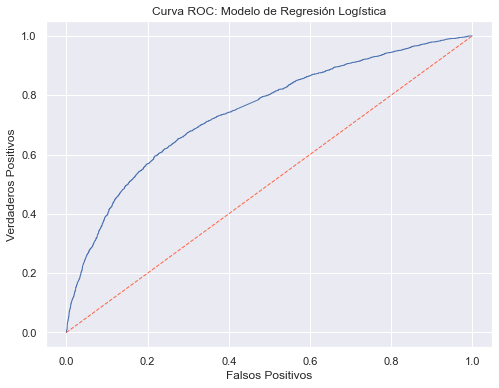

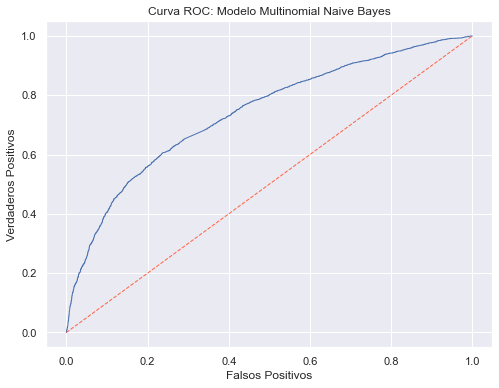

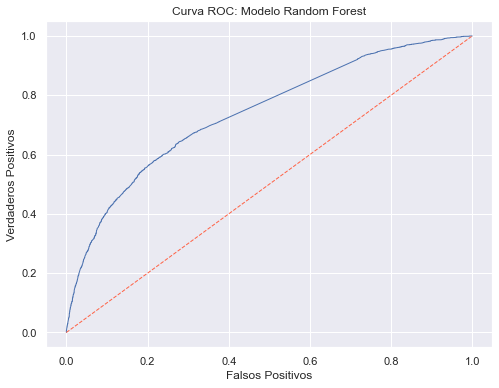

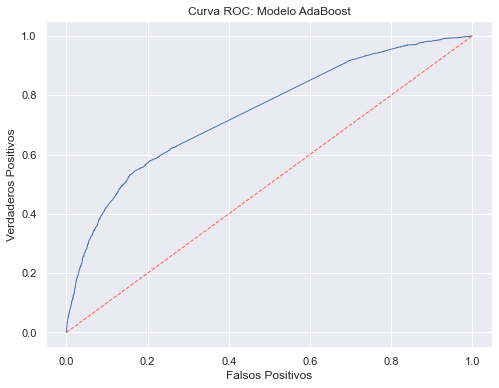

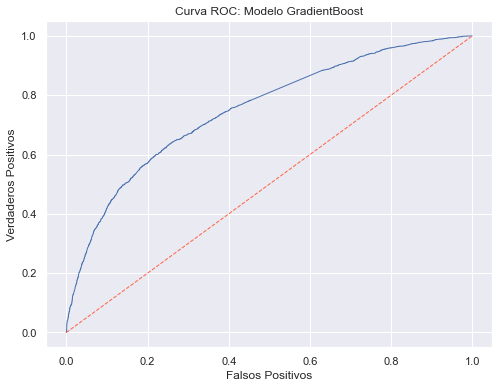

In [66]:
roc_graphic(y_test,y_hat_LR_proba,'Curva ROC: Modelo de Regresión Logística')
roc_graphic(y_test,y_hat_MNB_proba,'Curva ROC: Modelo Multinomial Naive Bayes')
roc_graphic(y_test,y_hat_RF_proba,'Curva ROC: Modelo Random Forest')
roc_graphic(y_test,y_hat_AB_proba,'Curva ROC: Modelo AdaBoost')
roc_graphic(y_test,y_hat_GB_proba,'Curva ROC: Modelo GradientBoost')

Se puede observar que la curvas, tienen un desempeño es bastante similar. Aparentemente el modelo de Random Forest, posee una linea azul más cercana a la línea que representa a un clasificador aleatorio, lo cual implica un rendimiento más bajo.

Será mejor revisar los valores del área bajo la curva para resultados más concluyentes.

In [67]:
dict_models = {
    'RegresionLineal': LR_AUC,
    'MultinomialNaiveBayes': MNB_AUC,
    'RandomForest': RF_AUC,
    'Adaboost': AB_AUC,
    'GradientBoost': GB_AUC,
}

In [68]:
val_arr = list(dict_models.values())
key_arr = list(dict_models.keys())

In [69]:
df_score_RL = pd.DataFrame(classification_report(y_test,y_hat_LR, output_dict=True))
df_score_MNB = pd.DataFrame(classification_report(y_test, y_hat_MNB, output_dict=True))
df_score_RF = pd.DataFrame(classification_report(y_test, y_hat_RF, output_dict=True))
df_score_AB = pd.DataFrame(classification_report(y_test, y_hat_AB, output_dict=True))
df_score_GB = pd.DataFrame(classification_report(y_test, y_hat_GB, output_dict=True))

In [70]:
array_scores = [df_score_RL,df_score_MNB,df_score_RF,df_score_AB,df_score_GB]

In [71]:
accu_scores = []
prec_scores = []

for i in array_scores:
    accu_scores.append(round(i['accuracy'][0],2))

for i in array_scores:
    prec_scores.append(round(i['1'][0],2))

In [72]:
df_resume = pd.DataFrame({'model': key_arr,
                          'precision': prec_scores, 
                          'accuracy': accu_scores,
                          'AUC':val_arr}, 
                         columns=['model',
                                  'precision',
                                  'accuracy',
                                  'AUC'])

In [73]:
df_resume

,model,precision,accuracy,AUC
0,RegresionLineal,0.67,0.72,0.676
1,MultinomialNaiveBayes,0.71,0.71,0.656
2,RandomForest,0.80,0.67,0.579
3,Adaboost,0.74,0.71,0.651
4,GradientBoost,0.70,0.72,0.670


En la tabla comparativa de los modelos, se observa que los valores del área bajo la curva (AUC) son mejores para los modelos de Regresión Lineal y Gradient Boost. El modelo que mejor desempeño tiene de AUC es la regresión lineal, con un desempeño 17% superior, respecto a un clasificador aleatorio, sin embargo la métrica de precision no cumple con las expectativas del cliente.

Para el caso del modelo Gradient Boost, los valores de las métricas de precision y accuracy, cumplen con el bench, pero también el modelo AdaBoost tuvo un excelente desempeño, sin embargo con un valor más bajo de AUC.

El modelo de Adaboost y gradient Boost clasifican de manera correcta sobre un 70% de los tweets efectivamente positivos y negativos. Sin embargo el modelo Adaboost, tiene una mejor precision, por lo tanto solo un 16% de los mensajes verdaderamente positivos no son detectados.

En conclusión, si se privilegia un modelo balanceado respecto a las métricas de precision y accuracy, sumado a las métricas de referencia del cliente, el modelamiento con Adaboost, es el que de mejor forma cumple las expectativas.

In [568]:
pickle.dump(model_AB_cv, open('model_AB.sav','wb'))